In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [41]:
file1 = pd.read_csv('marketing_customer_analysis.csv', index_col=0)
file1

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [42]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [5]:
#Check the data types of the columns.

In [43]:
file1.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [45]:
file1.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

In [46]:
numerical_data = file1.select_dtypes("number")
numerical_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [47]:
categorical_data = file1.select_dtypes("object")
categorical_data


,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [10]:
# Use seaborn library to construct distribution plots for the numerical variables

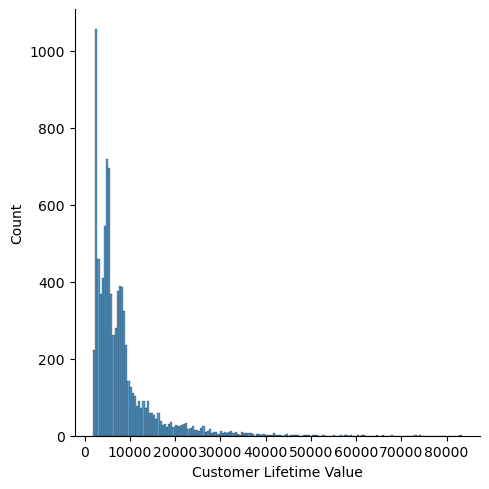

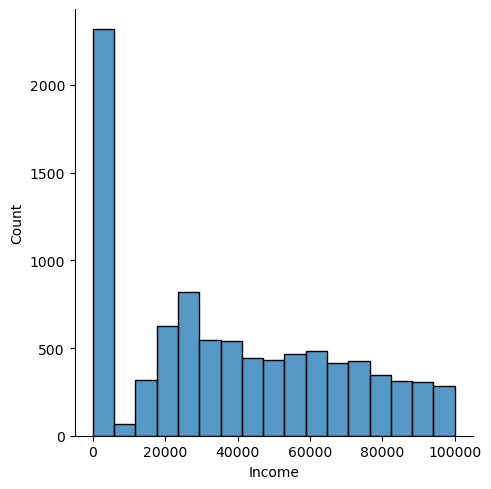

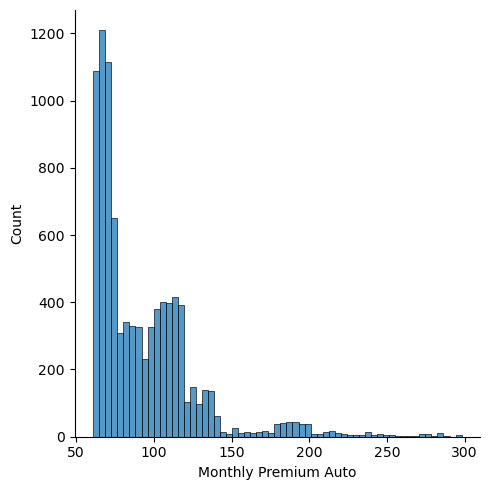

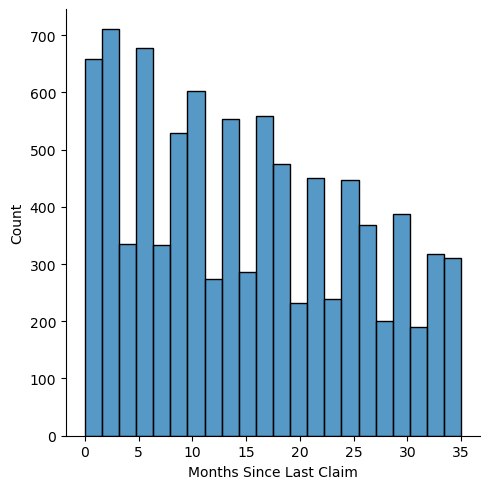

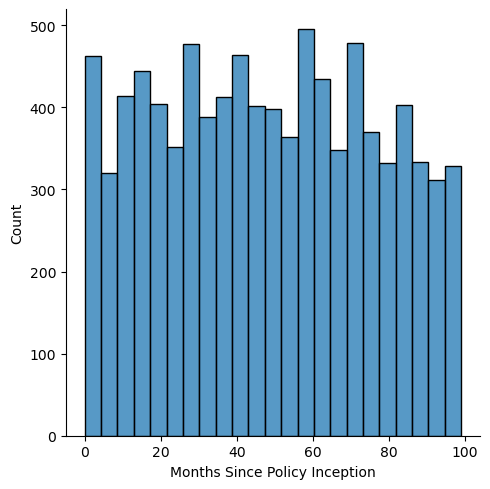

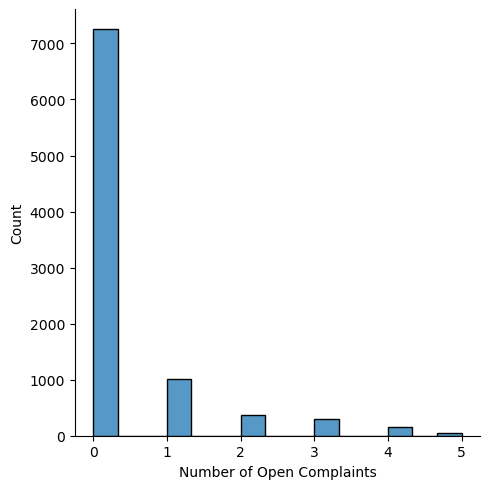

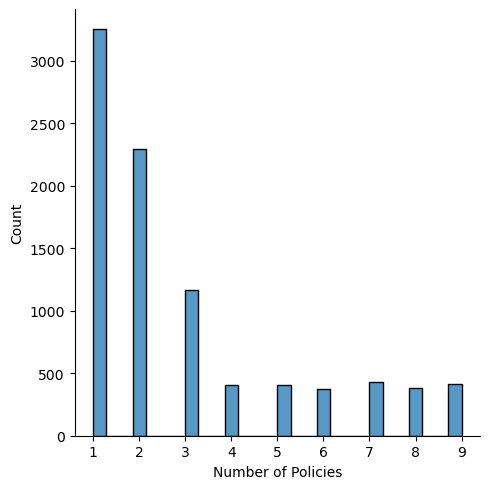

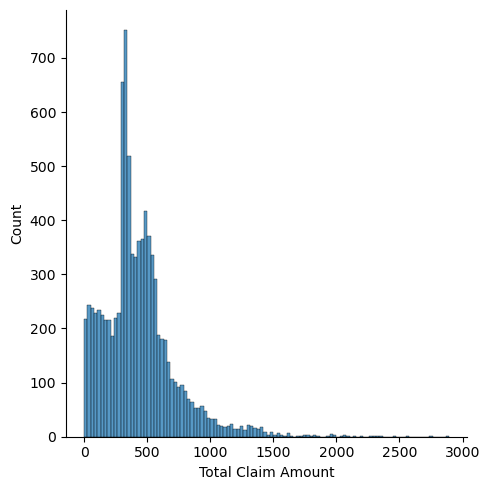

In [11]:
for column in numerical.columns:
    sns.displot(numerical[column])
    plt.show()

In [12]:
#Use Matplotlib to construct histograms

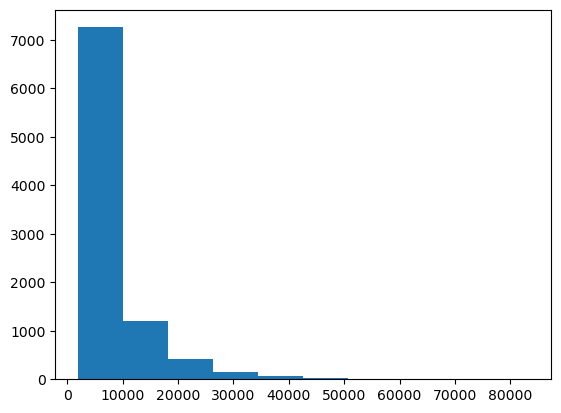

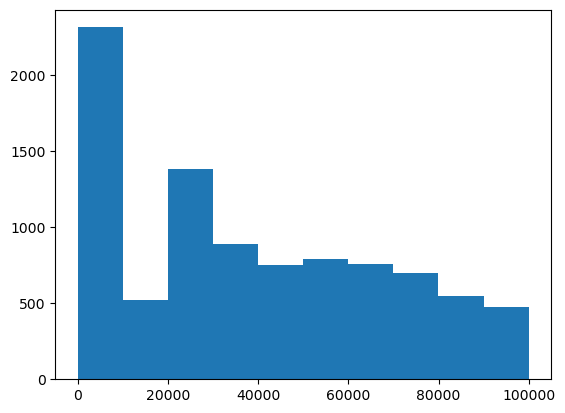

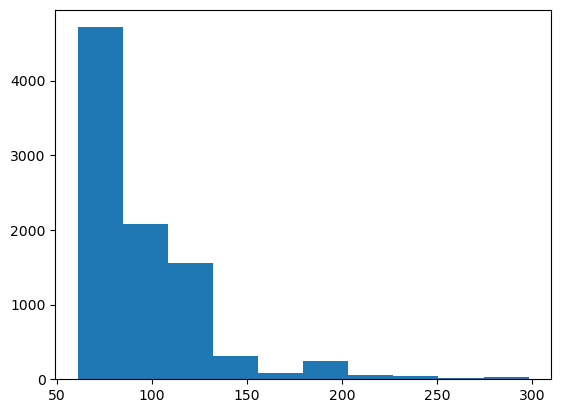

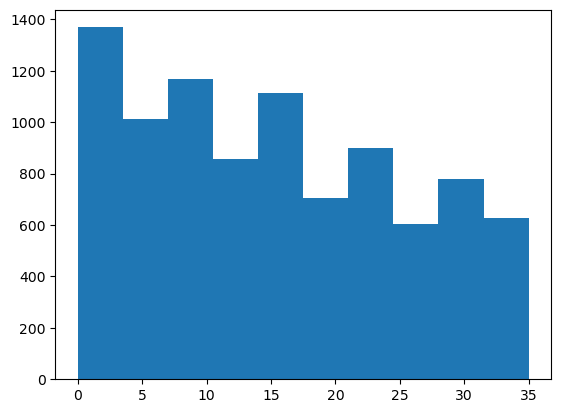

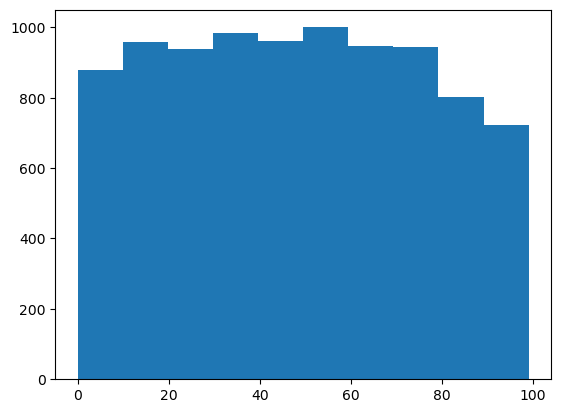

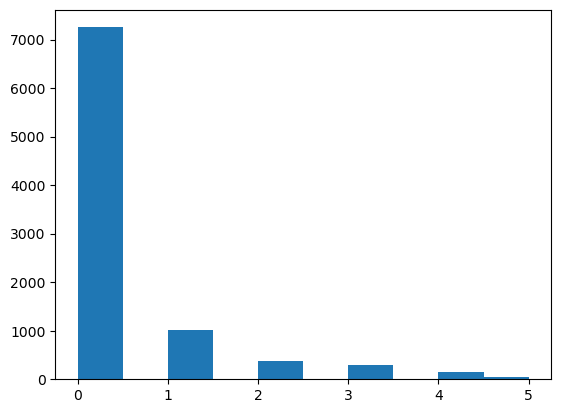

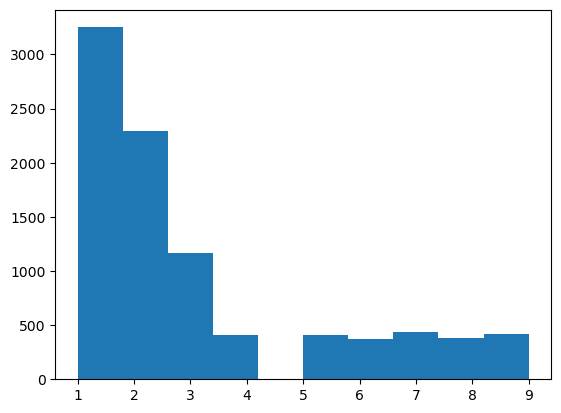

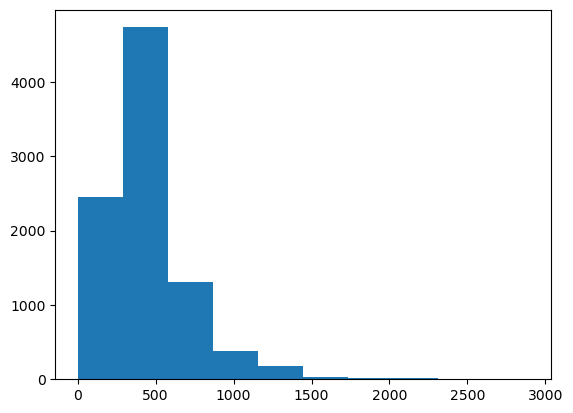

In [13]:
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.show()

In [14]:
#Do the distributions for different numerical variables look like a normal distribution

In [15]:
#In my oppinion none of the variables have a perfectly normal distribution, but some are closer to normal than others.

In [16]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [48]:
correlation_matrix = numerical_data.corr()
correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [49]:
correlation_matrix["Total Claim Amount"].sort_values(ascending=False)


Total Claim Amount               1.000000
Monthly Premium Auto             0.632017
Customer Lifetime Value          0.226451
Months Since Last Claim          0.007563
Months Since Policy Inception    0.003335
Number of Policies              -0.002354
Number of Open Complaints       -0.014241
Income                          -0.355254
Name: Total Claim Amount, dtype: float64

In [19]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

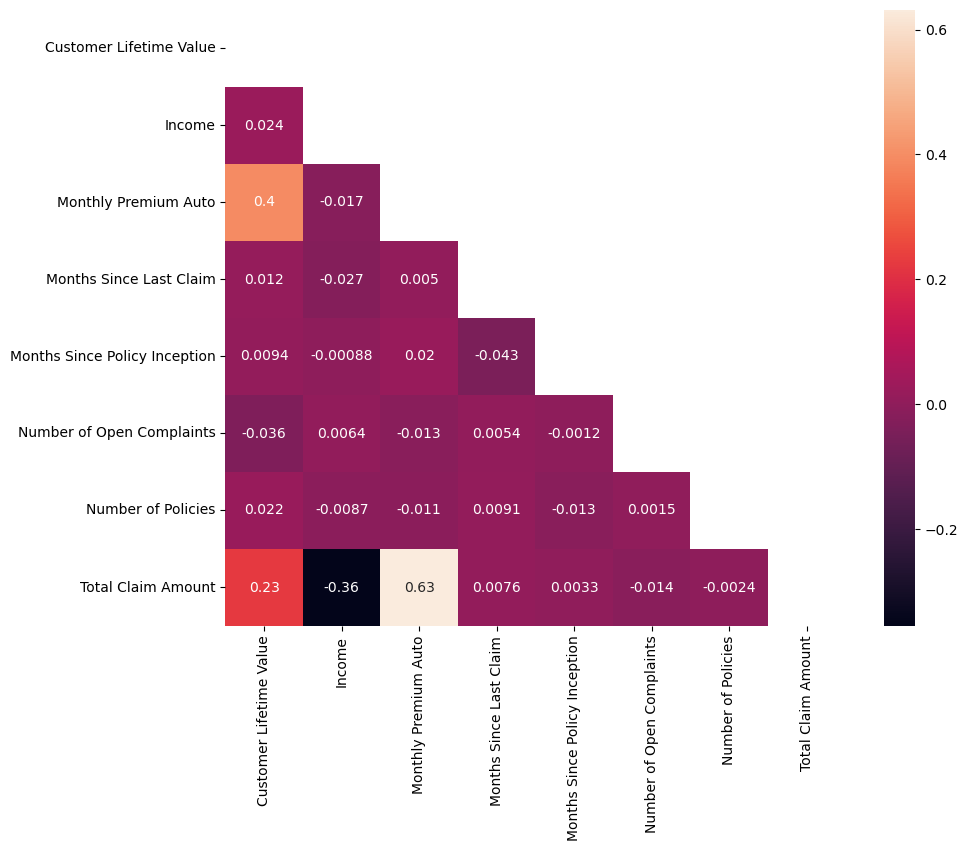

In [50]:
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True)
plt.show()

In [21]:
#Here starts lab 5 & 6 & 7

In [22]:
file1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [24]:
#x-y split
x = file1.drop(["Customer", "Total Claim Amount", 'Effective To Date'], axis=1)
y = file1["Total Claim Amount"]

In [26]:
#Normalize (numerical).
x_num = x.select_dtypes(np.number)

scaler = StandardScaler()
scaler.fit(x_num)
x_num_scaled = scaler.transform(x_num)

x_num_scaled = pd.DataFrame(x_num_scaled, columns = x_num.columns)
x_num_scaled

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


In [51]:
#One Hot/Label Encoding (categorical).
encoder = OneHotEncoder(drop='first')
encoder.fit(file1.select_dtypes("object"))

OneHotEncoder(drop='first')

In [52]:
encoder.transform(file1.select_dtypes("object")).todense()

matrix([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 1., 1., 0.]])

In [53]:
encoder.categories_[1][1:]

array(['Yes'], dtype=object)

In [56]:
cols = list(encoder.categories_[0])[1:] + list(encoder.categories_[1])[1:] + list(encoder.categories_[2])[1:] + list(encoder.categories_[3])[1:] + list(encoder.categories_[4])[1:] + list(encoder.categories_[5])[1:] + list(encoder.categories_[6])[1:] + list(encoder.categories_[7])[1:] + list(encoder.categories_[8])[1:] + list(encoder.categories_[9])[1:] + list(encoder.categories_[10])[1:] + list(encoder.categories_[11])[1:] + list(encoder.categories_[12])[1:] + list(encoder.categories_[13])[1:]
cols

['California',
 'Nevada',
 'Oregon',
 'Washington',
 'Yes',
 'Extended',
 'Premium',
 'College',
 'Doctor',
 'High School or Below',
 'Master',
 '1/10/11',
 '1/11/11',
 '1/12/11',
 '1/13/11',
 '1/14/11',
 '1/15/11',
 '1/16/11',
 '1/17/11',
 '1/18/11',
 '1/19/11',
 '1/2/11',
 '1/20/11',
 '1/21/11',
 '1/22/11',
 '1/23/11',
 '1/24/11',
 '1/25/11',
 '1/26/11',
 '1/27/11',
 '1/28/11',
 '1/29/11',
 '1/3/11',
 '1/30/11',
 '1/31/11',
 '1/4/11',
 '1/5/11',
 '1/6/11',
 '1/7/11',
 '1/8/11',
 '1/9/11',
 '2/1/11',
 '2/10/11',
 '2/11/11',
 '2/12/11',
 '2/13/11',
 '2/14/11',
 '2/15/11',
 '2/16/11',
 '2/17/11',
 '2/18/11',
 '2/19/11',
 '2/2/11',
 '2/20/11',
 '2/21/11',
 '2/22/11',
 '2/23/11',
 '2/24/11',
 '2/25/11',
 '2/26/11',
 '2/27/11',
 '2/28/11',
 '2/3/11',
 '2/4/11',
 '2/5/11',
 '2/6/11',
 '2/7/11',
 '2/8/11',
 '2/9/11',
 'Employed',
 'Medical Leave',
 'Retired',
 'Unemployed',
 'M',
 'Suburban',
 'Urban',
 'Married',
 'Single',
 'Personal Auto',
 'Special Auto',
 'Corporate L2',
 'Corporate L3'

In [72]:
file1[cols] = encoder.transform(file1.select_dtypes("object")).todense()
file1

ValueError: X has 0 features, but OneHotEncoder is expecting 15 features as input.

In [58]:
file1 = file1.drop(file1.select_dtypes("object"), axis=1)
file1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [59]:
file2 = file1.copy()
file2 = pd.get_dummies(file2, drop_first=True)
file2

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [38]:
file2.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [60]:
# Train-Test split
file1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [62]:
x = file1.drop(["Total Claim Amount"], axis=1)
y = file1["Total Claim Amount"]


In [64]:
# Train-Test split: To be able to test our ML model we will create a training set and a validation set:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [66]:
x_train

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Customer,,,,,,,
JY45873,5015.009472,48567,130,12,15,0,1
QK23524,5149.301306,26877,131,5,2,0,1
SK32629,4904.894731,12902,139,3,51,0,1
EP93369,8510.525936,0,121,5,94,0,8
ZX86243,3278.531880,70247,83,13,19,1,1
...,...,...,...,...,...,...,...
FX81675,7334.328083,87957,61,31,63,0,2
ZU30804,5498.940679,22520,73,17,64,0,3
LA53648,8992.779137,0,129,13,4,0,7


In [67]:
y_train

Customer
JY45873     624.000000
QK23524     628.800000
SK32629     667.200000
EP93369     871.200000
ZX86243     141.799422
              ...     
FX81675     308.321335
ZU30804     350.400000
LA53648    1059.572464
IS30295     667.200000
EH69733     344.015386
Name: Total Claim Amount, Length: 6393, dtype: float64

In [37]:
# Start the scaler object:
##scaler = StandardScaler()

# Fit the scaler object only on the training data:
##scaler.fit(X_train)

In [68]:
scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [69]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [71]:
# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(x_train_scaled, y_train)

LinearRegression()

In [76]:
# Get predictions for the test set:
predictions = lm.predict(x_test_scaled)

# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.52
RMSE: 198.41833774610308
MAE: 143.03788932697373


In [73]:
# Test:
predictions = lm.predict(x_test)
print("R2_score:", round(r2_score(y_test, predictions), 2))

R2_score: -286783716.62


<Axes: xlabel='Total Claim Amount'>

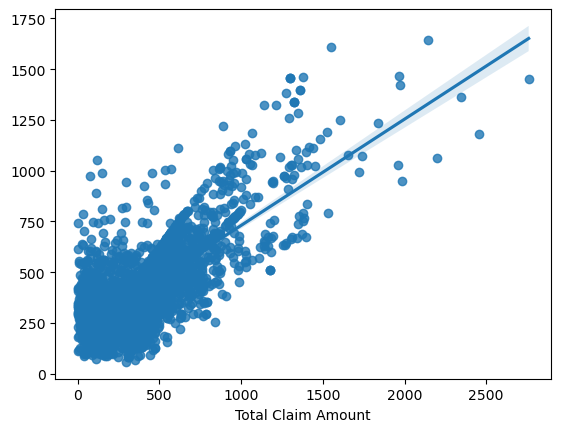

In [77]:
#Improve the linear regression model.

sns.regplot(x=y_test, y=predictions)

In [78]:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

y_train_scaled

Customer
JY45873    6.436150
QK23524    6.443813
SK32629    6.503090
EP93369    6.769872
ZX86243    4.954414
             ...   
FX81675    5.731143
ZU30804    5.859075
LA53648    6.965621
IS30295    6.503090
EH69733    5.840686
Name: Total Claim Amount, Length: 6393, dtype: float64

<Axes: xlabel='Total Claim Amount', ylabel='Density'>

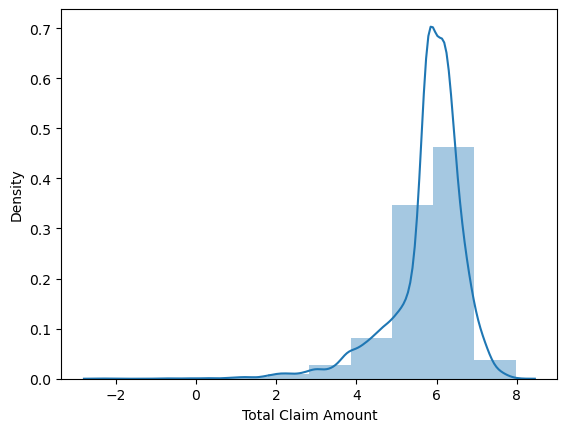

In [79]:
sns.distplot(y_train_scaled, bins=10)

<Axes: xlabel='Total Claim Amount', ylabel='Density'>

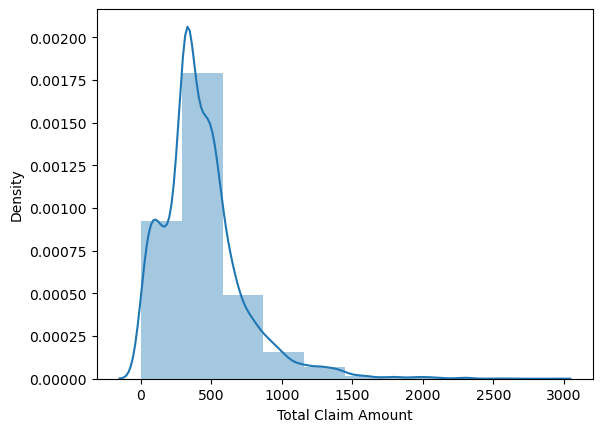

In [80]:
sns.distplot(y_train, bins=10)

In [81]:
lm = LinearRegression()
lm.fit(x_train_scaled, y_train_scaled)

predictions = lm.predict(x_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2))

R2_score: 0.24


<Axes: xlabel='Total Claim Amount'>

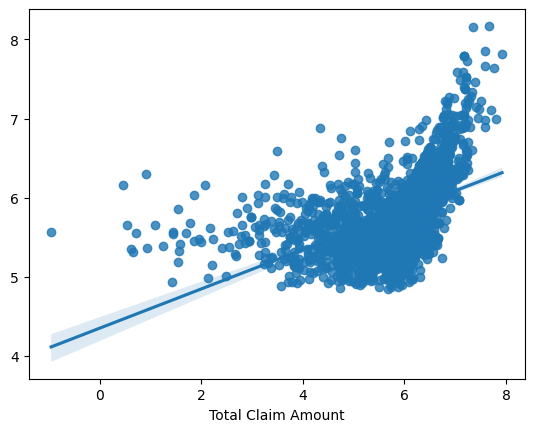

In [82]:
sns.regplot(x=y_test_scaled, y=predictions)

In [83]:
result_df = x_test
result_df["target"] = y_test
result_df["scaled_target"] = y_test_scaled
result_df["error"] = y_test_scaled - predictions
result_df.sort_values("error", ascending=False)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,target,scaled_target,error
Customer,,,,,,,,,,
XN11823,3764.465074,92600,94,9,48,0,1,842.437850,6.736300,1.498545
XR99310,3163.283136,97266,79,29,84,0,1,546.052144,6.302714,1.305664
SJ88799,3980.838735,92539,101,2,61,0,1,707.408058,6.561608,1.247495
OO11998,4583.748377,94804,115,13,79,4,1,764.592151,6.639343,1.235356
FN50615,8029.393076,96869,101,25,97,0,3,628.498605,6.443334,1.212979
...,...,...,...,...,...,...,...,...,...,...
RV52244,2498.350630,31357,63,2,88,0,1,2.016239,0.701234,-4.849242
FD64348,22563.618380,23046,65,18,7,3,2,1.687291,0.523124,-5.134886
WE80653,6827.178202,0,103,2,75,2,6,2.455033,0.898140,-5.397524


In [96]:
df_final = file1.copy()
df_no_outliers = df_final[df_final["Total Claim Amount"] < 960]
df_no_outliers

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
OC83172,8256.297800,62902,69,14,94,0,2,159.383042
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [97]:
# Repeating the modeling on the dataframe without outliers: 

# X-y split
X = df_no_outliers.drop(["Total Claim Amount"], axis=1)
y = df_no_outliers["Total Claim Amount"]

# train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train the model: 
lm = LinearRegression()
lm.fit(X_train, y_train)

# test the model:
predictions = lm.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.35
MSE: 28746.48810612274
RMSE: 169.54789325179698
MAE: 128.66333511261948
